# EEE3092F Practical Lab - Julia Simulations


#### PLAGIARISM STATEMENT

I certify that this assignment/report is my own work, based on my personal
study and/or research and that I have acknowledged all material and sources
used in its preparation, and that I
have not copied in part or whole or otherwise plagiarised the work of other
students and/or persons.

Name: Nkosinathi Ntuli (NTLNKO007)

Date: 15 April 2022

## DSB-SC AM (modulation & demodulation)

### DSB-SC AM (modulation)

In [1]:
using Pkg

In [ ]:
Pkg.add(["Plots", "PlotlyBase"])

In [ ]:
using Plots
#plotly() 
# commenting out plotly and use gr to reduce the file size for submission
gr()

1\. Simulating a Double sideband suppressed carrier amplitude modulation (DSB-SC AM) with the following parameters:

Modulating waveform: x(t) = cos(2πfmt) where fm=1 kHz.

Carrier wave oscillator: cos(2πfct) where fc=20 kHz.

Modulated carrier wave signal: ϕ(t) = f(t) cos(2πfct)


In [5]:
using FFTW

In [24]:
default(size=(700,350)); # Plot canvas size
default(label=""); # Turn off legends
default(ticks=:native); # 

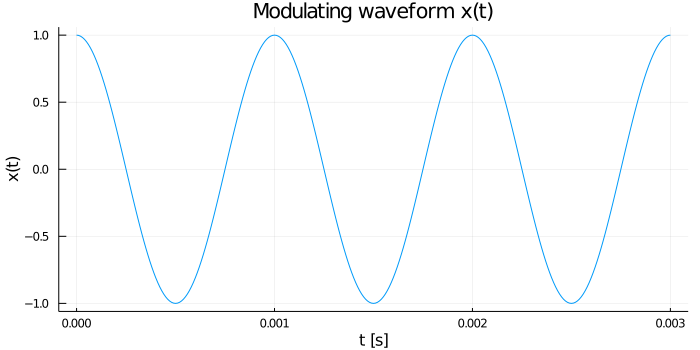

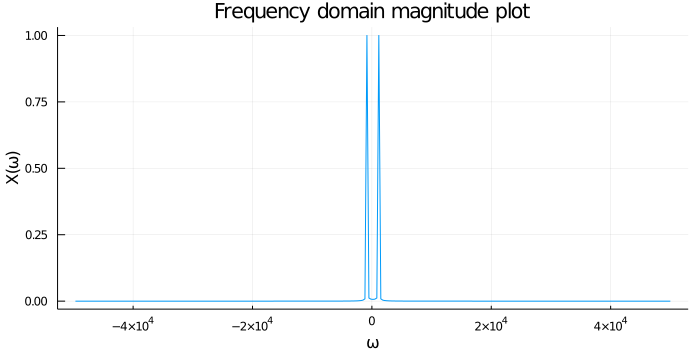

In [25]:
fs = 100e3
fm=1e3
fc=20e3

Δt = 1/fs
tmax = 3/fm
t = 0:Δt:tmax

xm = cos.(2π*fm.*t)

fig = plot(t, xm, 
    title = "Modulating waveform x(t)",  
    xlabel = "t [s]", 
    ylabel = "x(t)");

display(fig);


# in the freq domain
XM = fft(xm)

N = length(t)
Δf = fs/N
ω = (-fs/2+Δf):Δf:(fs/2)

fig = plot(ω, (2/N)*fftshift(abs.(XM)), # multiplying by (2/N) to normalise the amplitude
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "X(ω)");

display(fig);

1\. The carrier sinusoid cos(2πfct) 

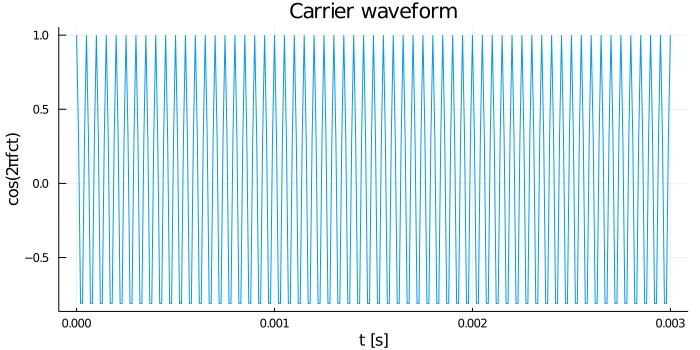

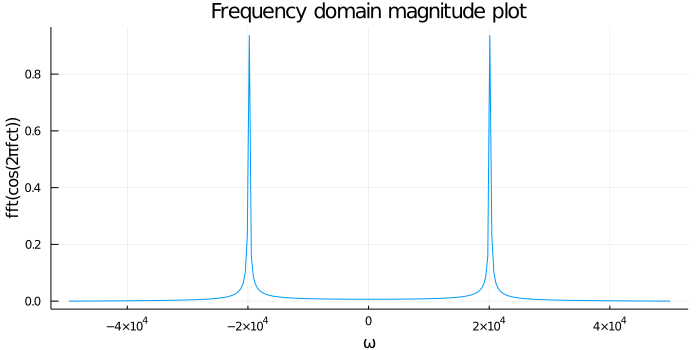

In [26]:
xc = cos.(2π*fc.*t)

fig = plot(t, xc, 
    title = "Carrier waveform",  
    xlabel = "t [s]", 
    ylabel = "cos(2πfct)");
display(fig)

XC = fft(xc);

fig = plot(ω,(2/N)*fftshift(abs.(XC)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "fft(cos(2πfct))");
display(fig)

3\. The amplitude modulated carrier wave ϕ(t) = x(t)cos(2πfct)

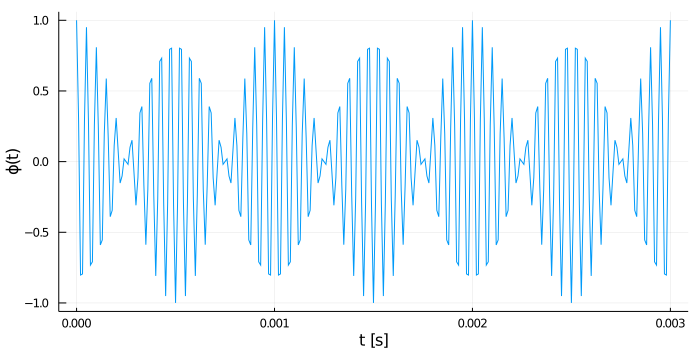

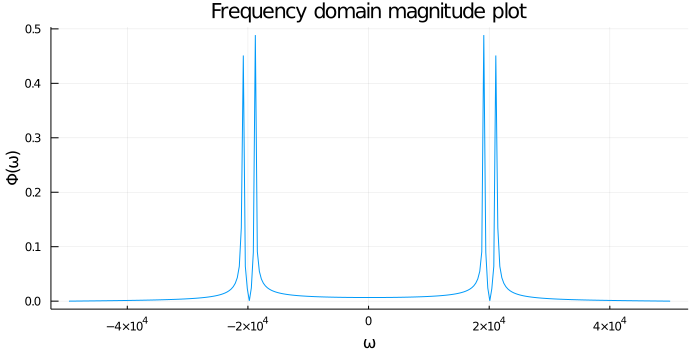

In [27]:
ϕ = xm .* xc 

fig = plot(t, ϕ,
    xlabel = "t [s]", 
    ylabel = "ϕ(t)");

display(fig)

#in the frequency domain
Φ = fft(ϕ)

fig = plot(ω, (2/N)*fftshift(abs.(Φ)),
    title = "Frequency domain magnitude plot",  
    xlabel = "ω", 
    ylabel = "Φ(ω)");

display(fig)

4\. A 1kHz square wave modulating waveform.

In [41]:
square_wave(t) = ((sin.(2*pi*fm*t) .> 0) .- 0.5)*2;

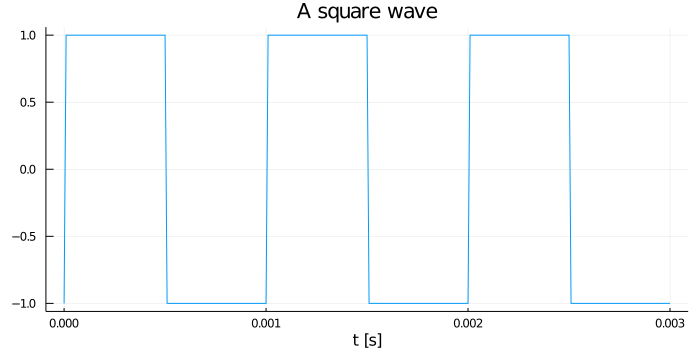

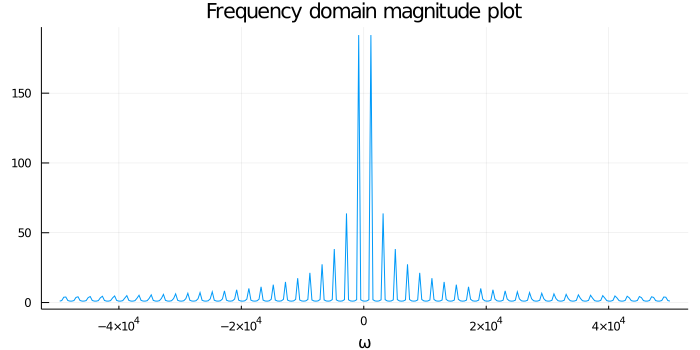

In [42]:
f_square = square_wave(t)

fig = plot(t, f_square,
    title = "A square wave",
    xlabel = "t [s]",
    ylabel = "");

display(fig)

F_Square = fft(f_square)

fig = plot(ω, fftshift(abs.(F_Square)),
    title = "Frequency domain magnitude plot",
    xlabel = "ω");

display(fig);

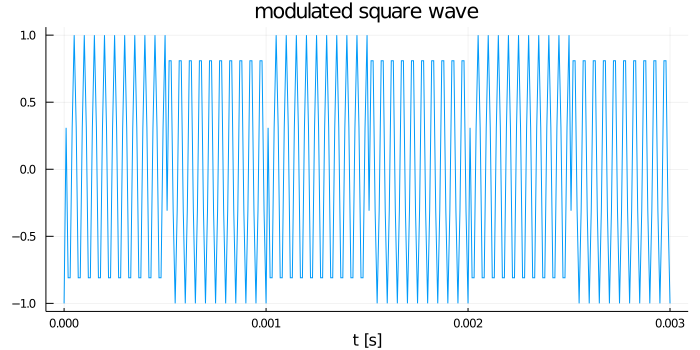

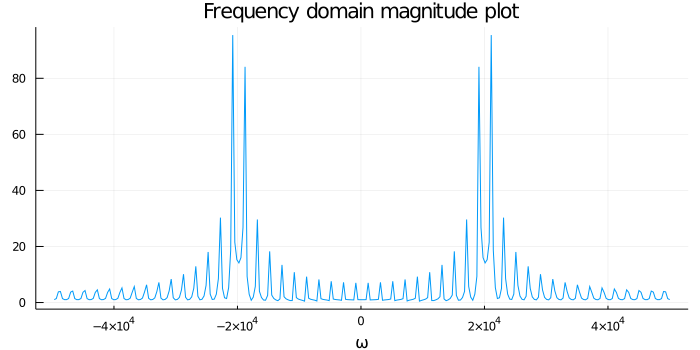

In [74]:
ϕ_square = f_square .* xc

fig = plot(t, ϕ_square,
    title = "modulated square wave",
    xlabel = "t [s]");

display(fig)

# in the freq daomain
Φ_Square = fft(ϕ_square)

fig = plot(ω, fftshift(abs.(Φ_Square)),
    title = "Frequency domain magnitude plot",
    xlabel = "ω");
display(fig)

### DSB-SC Demodulation

5\. Demodulated waveform

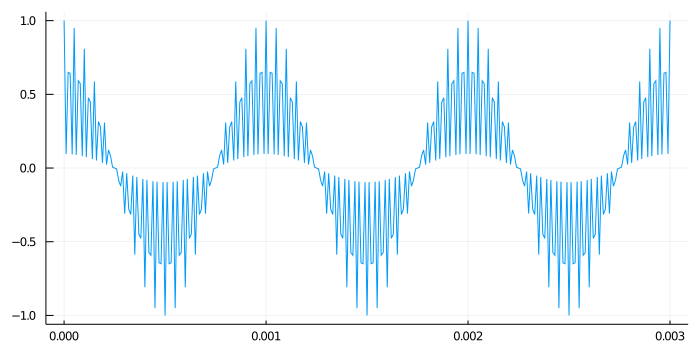

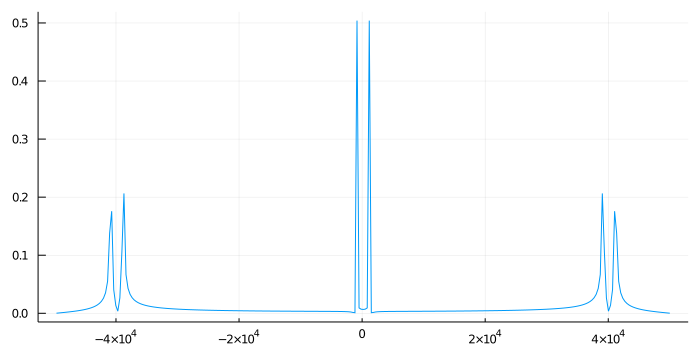

In [46]:
y = ϕ .* xc;

fig = plot(t, y);
display(fig)

Y = fft(y)

fig = plot(ω, (2/N)*fftshift(abs.(Y)));
display(fig)

6\. A Low Pass Filtered waveform

In [48]:
rect(t) = (abs.(t).<=0.5)*1.0 ;

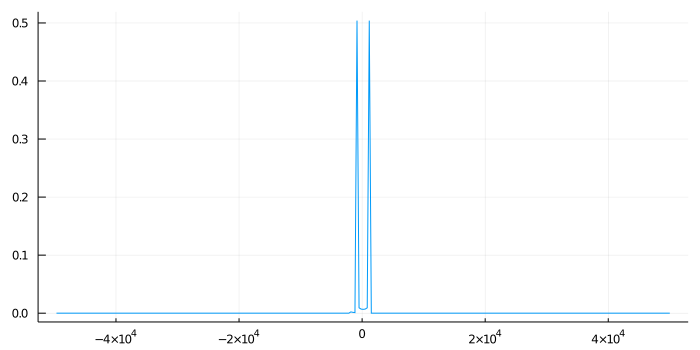

In [53]:
H = rect(ω ./3e3)

V = fftshift(H) .* Y

fig = plot(ω,(2/N)*fftshift(abs.(V)))    # Note, H in this case is purely real.

display(fig);

7\. Time domain filtered waveform

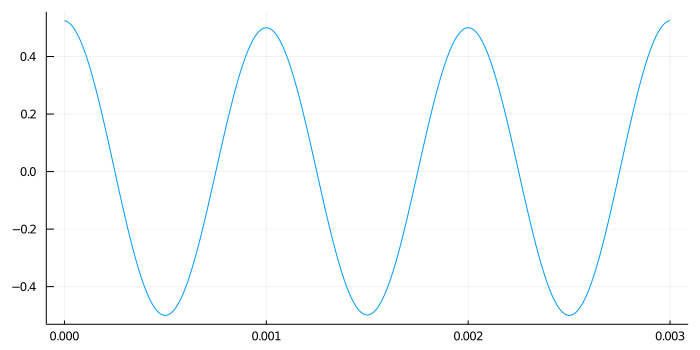

In [54]:
v = real.(ifft(V))

display(plot(t, v));


#### Effect of phase error in demodulation of DSC-SC

8\. The output of the demodulator for the cases of phase error from 0 to 90

(i) Phase error of 0 degrees 

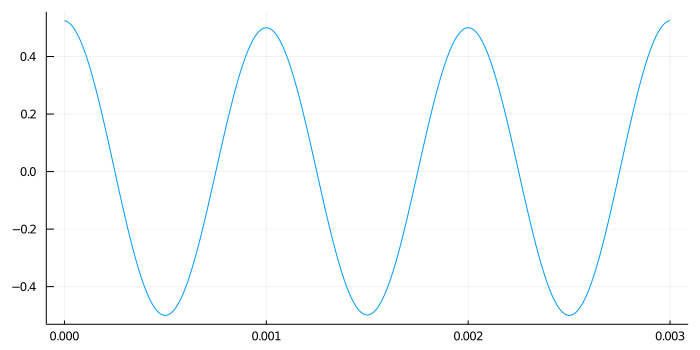

In [55]:
y_0 = ϕ .* cos.(2π*fc.*t .+ 0)

Y_0 = fft(y_0)
V_0 = fftshift(H) .* Y_0
v_0 = real.(ifft(V_0))
display(plot(t ,v_0));

(ii) Phase error of 30 degrees

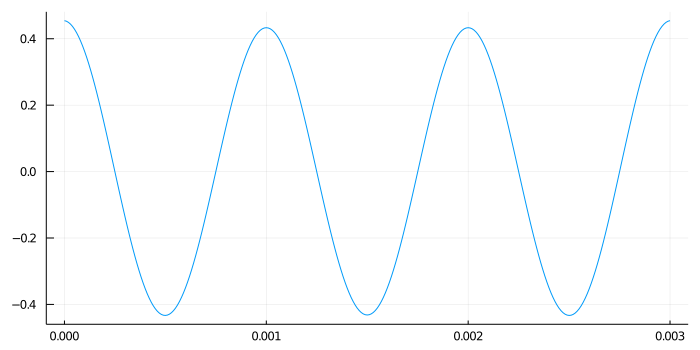

In [56]:
y_30 = ϕ .* cos.(2π*fc.*t .+ π/6)

Y_30 = fft(y_30)
V_30 = fftshift(H) .* Y_30
v_30 = real.(ifft(V_30))
display(plot(t ,v_30));

(iii) Phase error of 60 degrees

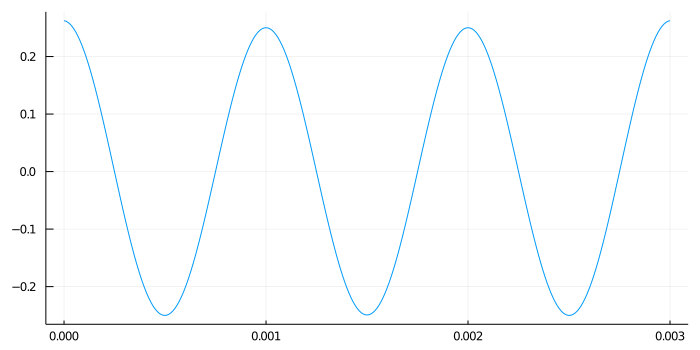

In [57]:
y_60 = ϕ .* cos.(2π*fc.*t .+ π/3)

Y_60 = fft(y_60)
V_60 = fftshift(H) .* Y_60
v_60 = real.(ifft(V_60))
display(plot(t ,v_60));

(iv) Phase error of 90 degrees

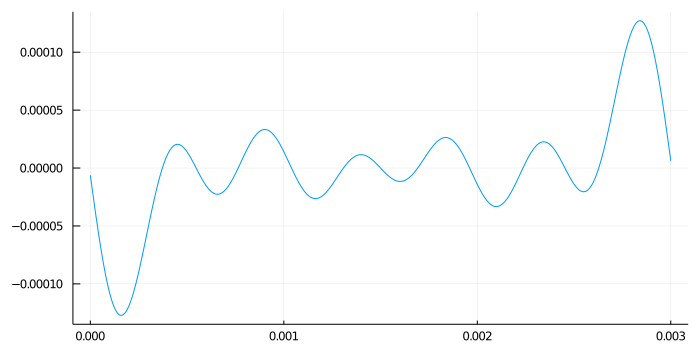

In [58]:
y_90 = ϕ .* cos.(2π*fc.*t .+ π/2)

Y_90 = fft(y_90)
V_90 = fftshift(H) .* Y_90
v_90 = real.(ifft(V_90))
display(plot(t ,v_90));

## DSB-LC AM

### DSB-LC AM modulation

DSB-LC with the following parameters:

Modulating waveform: f(t) = k cos(2πfmt) where fm=1 kHz and k is a constant (k<A).

Carrier wave oscillator: cos(2πfct) where fc=20 kHz.

Modulated carrier wave signal: ϕ(t) = Acos(2πfct) + f(t) cos(2πfct) where A is a constant.
- Let A=1 for these simulations. Initially, let k=0.5

9\. The modulating waveform f(t) showing three or more cycles.
Plot the frequency domain magnitude, with the axis nicely labelled in kHz. 

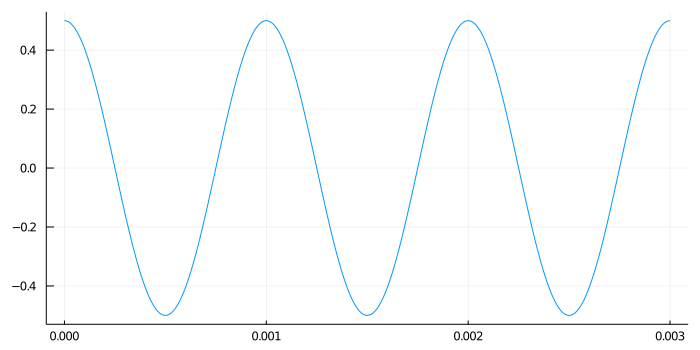

In [70]:
k = 0.5
A = 1
xm_lc = k .* xm 

display(plot(t, xm_lc));

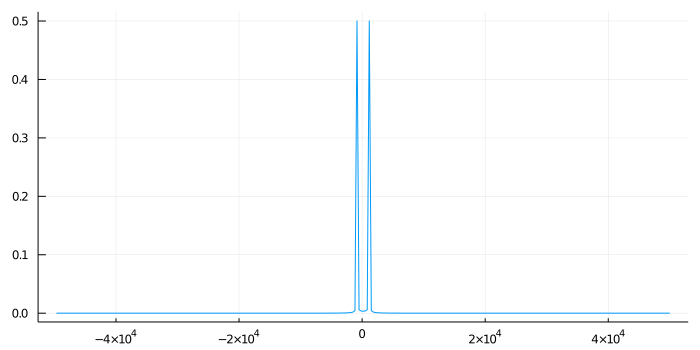

In [65]:
XM_lc = fft(xm_lc)

display(plot(ω, (2/N)*fftshift(abs.(XM_lc))));


10\. The amplitude modulated carrier wave ϕ(t)

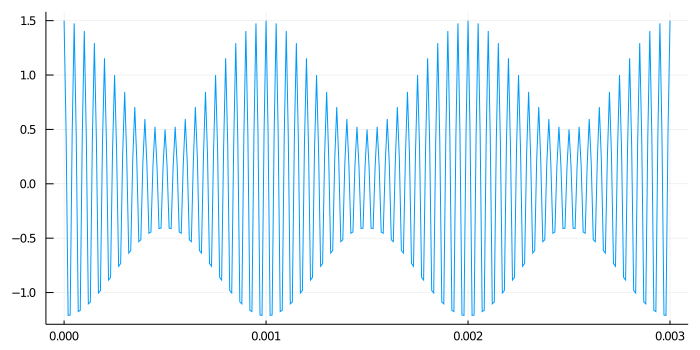

In [66]:
ϕ_lc = A .* xc + xm_lc .* xc

display(plot(t, ϕ_lc));


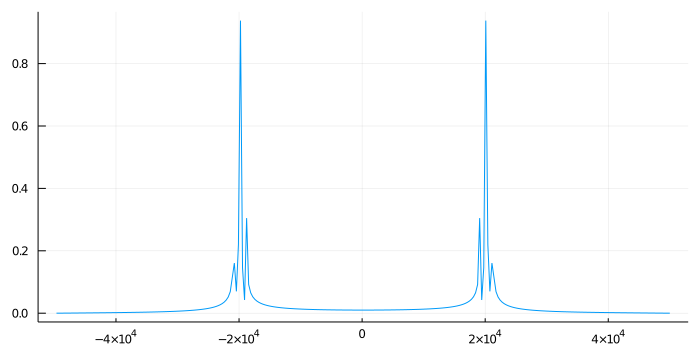

In [67]:
Φ_lc = fft(ϕ_lc)

display(plot(ω, (2/N)*fftshift(abs.(Φ_lc))));

### DSB-LC AM demodulation

11\. The demodulation of the DSB-LC AM signal.

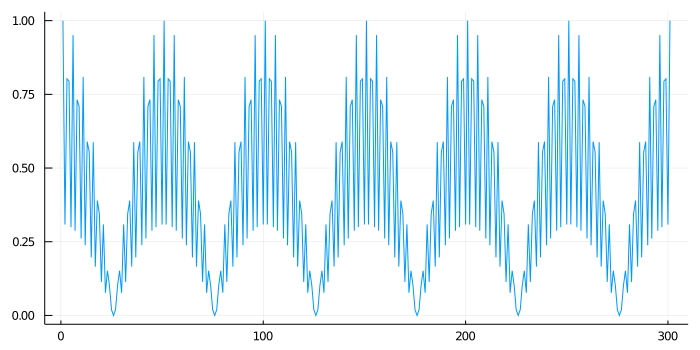

In [68]:
output_of_rectifier = abs.(ϕ);
#H = 
output_of_filter = real( ifft( fft(output_of_rectifier).*H ));

display(plot(output_of_rectifier));


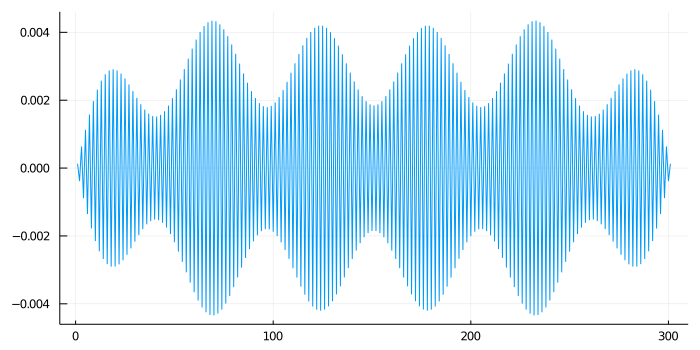

In [69]:
display(plot(output_of_filter));
